# Content-Based Recommendation Engine

This recommendation engine takes in a seed track and outputs track recommendations based on similarity measures

In [28]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler


%matplotlib inline

## 1. Read the recommendation pool

In [29]:
#read data
chart_tracks_df= pd.read_csv("BTS_spotify_daily_charts_tracks_predicted_genres.csv")
chart_tracks_df = chart_tracks_df.fillna(0)
opm = pd.read_csv('OPM_spotify_daily_charts_tracks_predicted_genres.csv')

chart_tracks_df = pd.concat([chart_tracks_df,opm]).reset_index()

#normalize loudness and tempo
scaler = MinMaxScaler()
chart_tracks_df['loudness'] = scaler.fit_transform(chart_tracks_df[['loudness']])
chart_tracks_df['tempo'] =  scaler.fit_transform(chart_tracks_df[['tempo']])
chart_tracks_df

,index,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,...,valence,tempo,predicted_genre_id,predicted_genre,predicted_genre_prob,predicted_electronic_prob,predicted_pop_prob,predicted_rnb_prob,playlist_id,playlist_name
0,0,6QBZlIxCB2lAPU2bM1ut1p,Dynamite - Instrumental,3Nrfpe0tUJi4K4DXYWgMUX,BTS,3zWmE5c3alhuoPLphxjMVd,198770,2020-08-21,29,0.861,...,0.6250,0.377977,0,electronic,0.98,1.000000,0.000000,0.000000,NaN,NaN
1,1,1HZ5LJMCzClg2pdomCnEPw,Dynamite - EDM Remix,3Nrfpe0tUJi4K4DXYWgMUX,BTS,2UX7xCHxzTLKuEom7VdwMJ,198939,2020-08-24,23,0.707,...,0.3180,0.433263,0,electronic,0.96,0.964286,0.035714,0.000000,NaN,NaN
2,2,5raJ9QoZOdoRZ1MZOcygkR,INTRO : Calling,3Nrfpe0tUJi4K4DXYWgMUX,BTS,1nScVw87kRJiT2bg2Kswhp,84613,2020-07-14,58,0.486,...,0.0806,0.568675,0,electronic,0.96,0.964286,0.000000,0.035714,NaN,NaN
3,3,0usLRFLmYXYahKNgXxsuJc,Trivia 起 : Just Dance,3Nrfpe0tUJi4K4DXYWgMUX,BTS,2lATw9ZAVp7ILQcOKPCPqp,225220,2018-08-24,68,0.723,...,0.3980,0.445778,0,electronic,0.82,0.821429,0.178571,0.000000,NaN,NaN
4,4,2JZPlXE8c0oLZoCsqFFmgo,Dynamite - Poolside Remix,3Nrfpe0tUJi4K4DXYWgMUX,BTS,6K4chJALBBMYmXjwgvqahx,182591,2020-08-28,60,0.686,...,0.4060,0.438954,0,electronic,0.78,0.785714,0.214286,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,1213,4EFinQKVMVKnPqIU6RZbWO,Mga Kababayan,1ayiGn4MLc427PozR13p1y,FrancisM,1XqiSs5j7RV7kYVPhZCRmX,322040,2009,38,0.743,...,0.5840,0.280820,2,rnb,0.36,0.035714,0.785714,0.178571,4EFinQKVMVKnPqIU6RZbWO,4EFinQKVMVKnPqIU6RZbWO
1317,1214,4f2N5TmeBDDHjBuuGUgFF7,The Yes Yes Show,2XHTklRsNMOOQT56Zm3WS4,Parokya Ni Edgar,3O938XtV5tBLuV4CiW55ys,292093,2004,44,0.608,...,0.6010,0.329108,0,electronic,0.36,0.500000,0.321429,0.178571,4f2N5TmeBDDHjBuuGUgFF7,4f2N5TmeBDDHjBuuGUgFF7
1318,1215,4VgrLYLervdW5bvAlnUmOK,Walang Hanggan,1YHVP6devH4bmmBZp8g8SC,Don Barredo,1PLAlskgtSaOEZHRiCEIr3,253714,2020-06-05,15,0.782,...,0.5050,0.566880,2,rnb,0.36,0.357143,0.392857,0.250000,4VgrLYLervdW5bvAlnUmOK,4VgrLYLervdW5bvAlnUmOK
1319,1216,63AWRNGp5CdVF9EHyb945T,Picture Mo Inday,3oP7ApvM9dvIXP6AufxCxt,Grin Department,5OwcI85oeyGW11qnOPBG4a,183933,2009-10-15,0,0.867,...,0.9610,0.513429,2,rnb,0.36,0.214286,0.428571,0.357143,63AWRNGp5CdVF9EHyb945T,63AWRNGp5CdVF9EHyb945T


In [30]:
chart_tracks_df.describe()

,index,duration,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,predicted_genre_id,predicted_genre_prob,predicted_electronic_prob,predicted_pop_prob,predicted_rnb_prob
count,1321.000000,1.321000e+03,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000
mean,565.031037,2.517736e+05,34.811506,0.547228,0.504984,5.330053,0.672125,0.856170,0.052878,0.430849,0.010057,0.160162,0.407988,0.449087,1.006056,0.613823,0.261166,0.510355,0.228480
std,369.464789,5.357927e+04,22.228770,0.137111,0.217482,3.533830,0.150546,0.351051,0.056276,0.309086,0.065609,0.117019,0.206661,0.189302,0.445475,0.122638,0.221117,0.168039,0.162152
min,0.000000,7.650600e+04,0.000000,0.144000,0.040300,0.000000,0.000000,0.000000,0.023200,0.000037,0.000000,0.030600,0.046700,0.000000,0.000000,0.340000,0.000000,0.000000,0.000000
25%,227.000000,2.194930e+05,21.000000,0.458000,0.331000,2.000000,0.583059,1.000000,0.030200,0.132000,0.000000,0.095600,0.241000,0.286034,1.000000,0.520000,0.071429,0.392857,0.107143
50%,557.000000,2.468160e+05,38.000000,0.554000,0.478000,6.000000,0.695160,1.000000,0.035300,0.423000,0.000001,0.117000,0.373000,0.470872,1.000000,0.620000,0.214286,0.500000,0.214286
75%,887.000000,2.797610e+05,50.000000,0.643000,0.679000,9.000000,0.782149,1.000000,0.050300,0.727000,0.000049,0.176000,0.548000,0.567134,1.000000,0.700000,0.428571,0.642857,0.321429
max,1217.000000,1.037586e+06,100.000000,0.890000,0.972000,11.000000,1.000000,1.000000,0.884000,0.981000,0.870000,0.955000,0.978000,1.000000,2.000000,1.000000,1.000000,0.964286,0.785714


In [31]:
chart_tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1321 entries, 0 to 1320
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      1321 non-null   int64  
 1   track_id                   1321 non-null   object 
 2   track_name                 1321 non-null   object 
 3   artist_id                  1321 non-null   object 
 4   artist_name                1321 non-null   object 
 5   album_id                   1321 non-null   object 
 6   duration                   1321 non-null   int64  
 7   release_date               1321 non-null   object 
 8   popularity                 1321 non-null   int64  
 9   danceability               1321 non-null   float64
 10  energy                     1321 non-null   float64
 11  key                        1321 non-null   int64  
 12  loudness                   1321 non-null   float64
 13  mode                       1321 non-null   int64

## 2. Input Seed Track


In [32]:
feature_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',\
                'liveness', 'valence', 'tempo']

In [33]:
seed_track_data = chart_tracks_df[chart_tracks_df['track_name']=='A Brand New Day (BTS World Original Soundtrack) [Pt. 2]'].iloc[0]
seed_track_data[feature_cols]

danceability           0.804
energy                 0.498
loudness            0.690399
speechiness           0.0571
acousticness           0.339
instrumentalness    0.000236
liveness                0.18
valence                0.704
tempo               0.322647
Name: 90, dtype: object

## 3. Explore Similarity Measures

In [34]:
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_similarity


##### Use audio features only

Euclidean

In [35]:
chart_tracks_df['euclidean_dist'] = chart_tracks_df.apply(lambda x: euclidean_distances(x[feature_cols].values.reshape(-1, 1),\
                                                                  seed_track_data[feature_cols].values.reshape(-1, 1))\
                                                                  .flatten()[0], axis=1)
#get top 10 nearest to seed_track_data
recommendation_df = chart_tracks_df[chart_tracks_df['track_id']!=seed_track_data['track_id']].sort_values('euclidean_dist')[:10]
recommendation_df[['track_name','artist_name','euclidean_dist','predicted_genre']+feature_cols]

,track_name,artist_name,euclidean_dist,predicted_genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
1201,Bagay Tayo,ALLMO$T,0.000,rnb,0.804,0.557,0.677808,0.1630,0.3220,0.000000,0.1060,0.645,0.312326
849,Bilog Na Naman Ang Buwan,Tropical Depression,0.000,rnb,0.804,0.566,0.387854,0.1750,0.5350,0.000000,0.3450,0.918,0.286034
503,Call Me Yours,Jemay Santiago,0.002,pop,0.806,0.312,0.390091,0.1220,0.8140,0.000000,0.1340,0.316,0.375795
589,Weak,TFTI,0.002,pop,0.802,0.389,0.660594,0.0340,0.6760,0.000000,0.1170,0.403,0.483925
977,Manila,Hotdog,0.003,pop,0.801,0.538,0.635799,0.1310,0.2850,0.000003,0.1120,0.460,0.413598
19,Outro : Ego,BTS,0.004,electronic,0.808,0.903,0.865670,0.0958,0.0121,0.000233,0.0993,0.473,0.396362
21,Outro : Ego,BTS,0.004,electronic,0.808,0.903,0.865670,0.0958,0.0121,0.000233,0.0993,0.473,0.396362
1044,Nandyan Agad Ako,Ex Battalion,0.005,pop,0.799,0.529,0.654429,0.0615,0.6610,0.000000,0.0856,0.601,0.490771
1320,Saved,francis,0.005,pop,0.799,0.541,0.690091,0.0475,0.0662,0.000006,0.1210,0.603,0.502868
1222,Linda Blair Reprise,Tanya Markova,0.006,rnb,0.798,0.683,0.848858,0.0362,0.3890,0.000000,0.1020,0.925,0.471503


Manhattan

In [36]:
chart_tracks_df['manhattan_dist'] = chart_tracks_df.apply(lambda x: manhattan_distances(x[feature_cols].values.reshape(-1, 1),\
                                                                  seed_track_data[feature_cols].values.reshape(-1, 1))\
                                                                  .flatten()[0], axis=1)
#get top 10 nearest to seed_track_data
recommendation_df = chart_tracks_df[chart_tracks_df['track_id']!=seed_track_data['track_id']].sort_values('manhattan_dist')[:10]
recommendation_df[['track_name','artist_name','manhattan_dist','predicted_genre']+feature_cols]

,track_name,artist_name,manhattan_dist,predicted_genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
1201,Bagay Tayo,ALLMO$T,0.000,rnb,0.804,0.557,0.677808,0.1630,0.3220,0.000000,0.1060,0.645,0.312326
849,Bilog Na Naman Ang Buwan,Tropical Depression,0.000,rnb,0.804,0.566,0.387854,0.1750,0.5350,0.000000,0.3450,0.918,0.286034
503,Call Me Yours,Jemay Santiago,0.002,pop,0.806,0.312,0.390091,0.1220,0.8140,0.000000,0.1340,0.316,0.375795
589,Weak,TFTI,0.002,pop,0.802,0.389,0.660594,0.0340,0.6760,0.000000,0.1170,0.403,0.483925
977,Manila,Hotdog,0.003,pop,0.801,0.538,0.635799,0.1310,0.2850,0.000003,0.1120,0.460,0.413598
21,Outro : Ego,BTS,0.004,electronic,0.808,0.903,0.865670,0.0958,0.0121,0.000233,0.0993,0.473,0.396362
19,Outro : Ego,BTS,0.004,electronic,0.808,0.903,0.865670,0.0958,0.0121,0.000233,0.0993,0.473,0.396362
1320,Saved,francis,0.005,pop,0.799,0.541,0.690091,0.0475,0.0662,0.000006,0.1210,0.603,0.502868
1044,Nandyan Agad Ako,Ex Battalion,0.005,pop,0.799,0.529,0.654429,0.0615,0.6610,0.000000,0.0856,0.601,0.490771
1222,Linda Blair Reprise,Tanya Markova,0.006,rnb,0.798,0.683,0.848858,0.0362,0.3890,0.000000,0.1020,0.925,0.471503


Cosine

In [37]:
chart_tracks_df['cosine_dist'] = chart_tracks_df.apply(lambda x: 1-cosine_similarity(x[feature_cols].values.reshape(1, -1),\
                                                                  seed_track_data[feature_cols].values.reshape(1, -1))\
                                                                  .flatten()[0], axis=1)
#get top 10 nearest to seed_track_data
recommendation_df = chart_tracks_df[chart_tracks_df['track_id']!=seed_track_data['track_id']].sort_values('cosine_dist')[:10]
recommendation_df[['track_name','artist_name','cosine_dist','predicted_genre']+feature_cols]

,track_name,artist_name,cosine_dist,predicted_genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
1051,Sirang Plaka (Acoustic),The Juans,0.003143,rnb,0.773,0.449,0.646301,0.0564,0.409,0.000811,0.1150,0.656,0.286308
1072,Pangarap,Barbie's Cradle,0.005004,rnb,0.684,0.425,0.680913,0.0233,0.302,0.015900,0.0836,0.559,0.293376
1056,Closer You And I,Piolo Pascual,0.005606,pop,0.644,0.410,0.565114,0.0307,0.391,0.000001,0.0982,0.556,0.267512
1201,Bagay Tayo,ALLMO$T,0.005703,rnb,0.804,0.557,0.677808,0.1630,0.322,0.000000,0.1060,0.645,0.312326
988,Sana,Up Dharma Down,0.007231,rnb,0.731,0.478,0.717945,0.0302,0.391,0.000007,0.1660,0.606,0.190721
1069,Dahil Tanging Ikaw,Jaya,0.008067,rnb,0.767,0.452,0.651461,0.0312,0.266,0.000000,0.0872,0.538,0.196579
855,Eba,Kiyo,0.008259,rnb,0.706,0.536,0.625251,0.0354,0.185,0.000732,0.1180,0.683,0.248276
1239,Pera Pera Lang,Kunnns,0.008683,pop,0.831,0.499,0.602237,0.0717,0.403,0.000000,0.1600,0.659,0.470859
678,Sulyap,Jom,0.009393,rnb,0.651,0.536,0.699863,0.0350,0.268,0.000035,0.1630,0.736,0.209989
1053,"Pag-Ibig - From ""Dangwa""",Sponge Cola,0.009581,pop,0.617,0.531,0.611963,0.0284,0.211,0.000000,0.0874,0.647,0.255058


View histograms of the 3 similarity measures

array([[<AxesSubplot:title={'center':'euclidean_dist'}>,
        <AxesSubplot:title={'center':'manhattan_dist'}>],
       [<AxesSubplot:title={'center':'cosine_dist'}>, <AxesSubplot:>]],
      dtype=object)

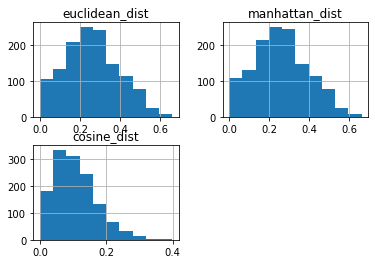

In [38]:
chart_tracks_df[['euclidean_dist','manhattan_dist','cosine_dist']].hist()

## 4. Modify similarity criteria

##### Audio features and with same predicted genre

In [39]:
#get top 10 nearest to seed_track_data
recommendation_df = chart_tracks_df[chart_tracks_df['predicted_genre']==seed_track_data['predicted_genre']]\
                                    [chart_tracks_df['track_id']!=seed_track_data['track_id']]\
                                    .sort_values('cosine_dist')[:10]
recommendation_df[['track_name','artist_name','cosine_dist','predicted_genre']+feature_cols]

<ipython-input-39-3525b1bc5e04>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  recommendation_df = chart_tracks_df[chart_tracks_df['predicted_genre']==seed_track_data['predicted_genre']]\


,track_name,artist_name,cosine_dist,predicted_genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
1051,Sirang Plaka (Acoustic),The Juans,0.003143,rnb,0.773,0.449,0.646301,0.0564,0.409,0.000811,0.1150,0.656,0.286308
1072,Pangarap,Barbie's Cradle,0.005004,rnb,0.684,0.425,0.680913,0.0233,0.302,0.015900,0.0836,0.559,0.293376
1201,Bagay Tayo,ALLMO$T,0.005703,rnb,0.804,0.557,0.677808,0.1630,0.322,0.000000,0.1060,0.645,0.312326
988,Sana,Up Dharma Down,0.007231,rnb,0.731,0.478,0.717945,0.0302,0.391,0.000007,0.1660,0.606,0.190721
1069,Dahil Tanging Ikaw,Jaya,0.008067,rnb,0.767,0.452,0.651461,0.0312,0.266,0.000000,0.0872,0.538,0.196579
855,Eba,Kiyo,0.008259,rnb,0.706,0.536,0.625251,0.0354,0.185,0.000732,0.1180,0.683,0.248276
678,Sulyap,Jom,0.009393,rnb,0.651,0.536,0.699863,0.0350,0.268,0.000035,0.1630,0.736,0.209989
1222,Linda Blair Reprise,Tanya Markova,0.010364,rnb,0.798,0.683,0.848858,0.0362,0.389,0.000000,0.1020,0.925,0.471503
1191,Dear Kuya,Sugarfree,0.010468,rnb,0.728,0.543,0.611370,0.0354,0.401,0.000000,0.1060,0.722,0.464568
1206,Honey Mae,Jarlo Bâse,0.011005,rnb,0.744,0.536,0.842648,0.0993,0.239,0.000004,0.0942,0.682,0.311988


###### Audio features and genre probabilities

In [40]:
genre_cols = [col for col in chart_tracks_df.columns if ('predicted_' in col)&('genre' not in col)]
cols = feature_cols + genre_cols
chart_tracks_df['cosine_dist_mod'] = chart_tracks_df.apply(lambda x: 1-cosine_similarity(x[cols].values.reshape(1, -1),\
                                                                  seed_track_data[cols].values.reshape(1, -1))\
                                                                  .flatten()[0], axis=1)
recommendation_df = chart_tracks_df[chart_tracks_df['track_id']!=seed_track_data['track_id']]\
                                   .sort_values('cosine_dist_mod')[:10]
recommendation_df[['track_name','artist_name','cosine_dist_mod','predicted_genre']+cols]

,track_name,artist_name,cosine_dist_mod,predicted_genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,predicted_electronic_prob,predicted_pop_prob,predicted_rnb_prob
941,Love & Gin,brayll,0.011939,pop,0.767,0.527,0.792466,0.0347,0.399,0.000137,0.1140,0.553,0.292854,0.142857,0.285714,0.571429
1239,Pera Pera Lang,Kunnns,0.013498,pop,0.831,0.499,0.602237,0.0717,0.403,0.000000,0.1600,0.659,0.470859,0.071429,0.464286,0.464286
1163,"Isa, Dalawa, Tatlo",Kyline Alcantara,0.013984,rnb,0.722,0.644,0.640320,0.0513,0.470,0.000743,0.0667,0.797,0.324678,0.107143,0.321429,0.571429
1288,Sunrise,Fred Engay,0.015938,pop,0.668,0.514,0.761598,0.0366,0.168,0.000000,0.0852,0.691,0.388581,0.071429,0.428571,0.500000
1219,This Guy's in Love with You Pare,Chito Moiranda,0.017100,pop,0.725,0.721,0.788037,0.0511,0.477,0.000000,0.0862,0.953,0.439826,0.000000,0.392857,0.607143
1299,Sayaw,KE,0.018674,pop,0.680,0.742,0.829041,0.0291,0.375,0.000000,0.1050,0.758,0.286461,0.107143,0.321429,0.571429
988,Sana,Up Dharma Down,0.018757,rnb,0.731,0.478,0.717945,0.0302,0.391,0.000007,0.1660,0.606,0.190721,0.035714,0.535714,0.428571
977,Manila,Hotdog,0.019148,pop,0.801,0.538,0.635799,0.1310,0.285,0.000003,0.1120,0.460,0.413598,0.142857,0.357143,0.500000
1196,Akin Ka Na Lang,The Company,0.019981,pop,0.819,0.396,0.677078,0.0730,0.523,0.000000,0.1070,0.690,0.471548,0.142857,0.392857,0.464286
1266,Bahaghari,Klo,0.020965,pop,0.833,0.525,0.642329,0.1580,0.498,0.000000,0.0781,0.688,0.554024,0.071429,0.428571,0.500000


In [41]:
recommendation_df['track_id'].values

array(['7oVzXuQa5qQOP47Z2Z27qQ', '7490YBIBbiot6hEbKJCJvt',
       '4ngTbGyqle4chBGrYCAbGq', '2ShJmQqsGHvcwBrkQWECCp',
       '54YxwPyApyLnBxETAwIeSz', '68lkqHvaANa6ptjVOZmyUU',
       '3WgYEnpYw6n1o3JOuHPUxF', '0wuAxX9bQnOBSy3NnpKyN3',
       '79yCQrawsilxU56g0UifKQ', '2tuqqr3kJCH0LSgOzgMrRn'], dtype=object)